In [1]:
from transformers.utils import logging
logging.set_verbosity_error()

import warnings
warnings.filterwarnings("ignore", message="Using the model-agnostic default `max_length`")

In [2]:
from transformers import BlipForConditionalGeneration

In [3]:
model = BlipForConditionalGeneration.from_pretrained(
    "Salesforce/blip-image-captioning-base")

In [4]:
from transformers import AutoProcessor

In [5]:
processor = AutoProcessor.from_pretrained(
    "Salesforce/blip-image-captioning-base")

In [6]:
from PIL import Image

In [7]:
image = Image.open("./montreal.jpg")

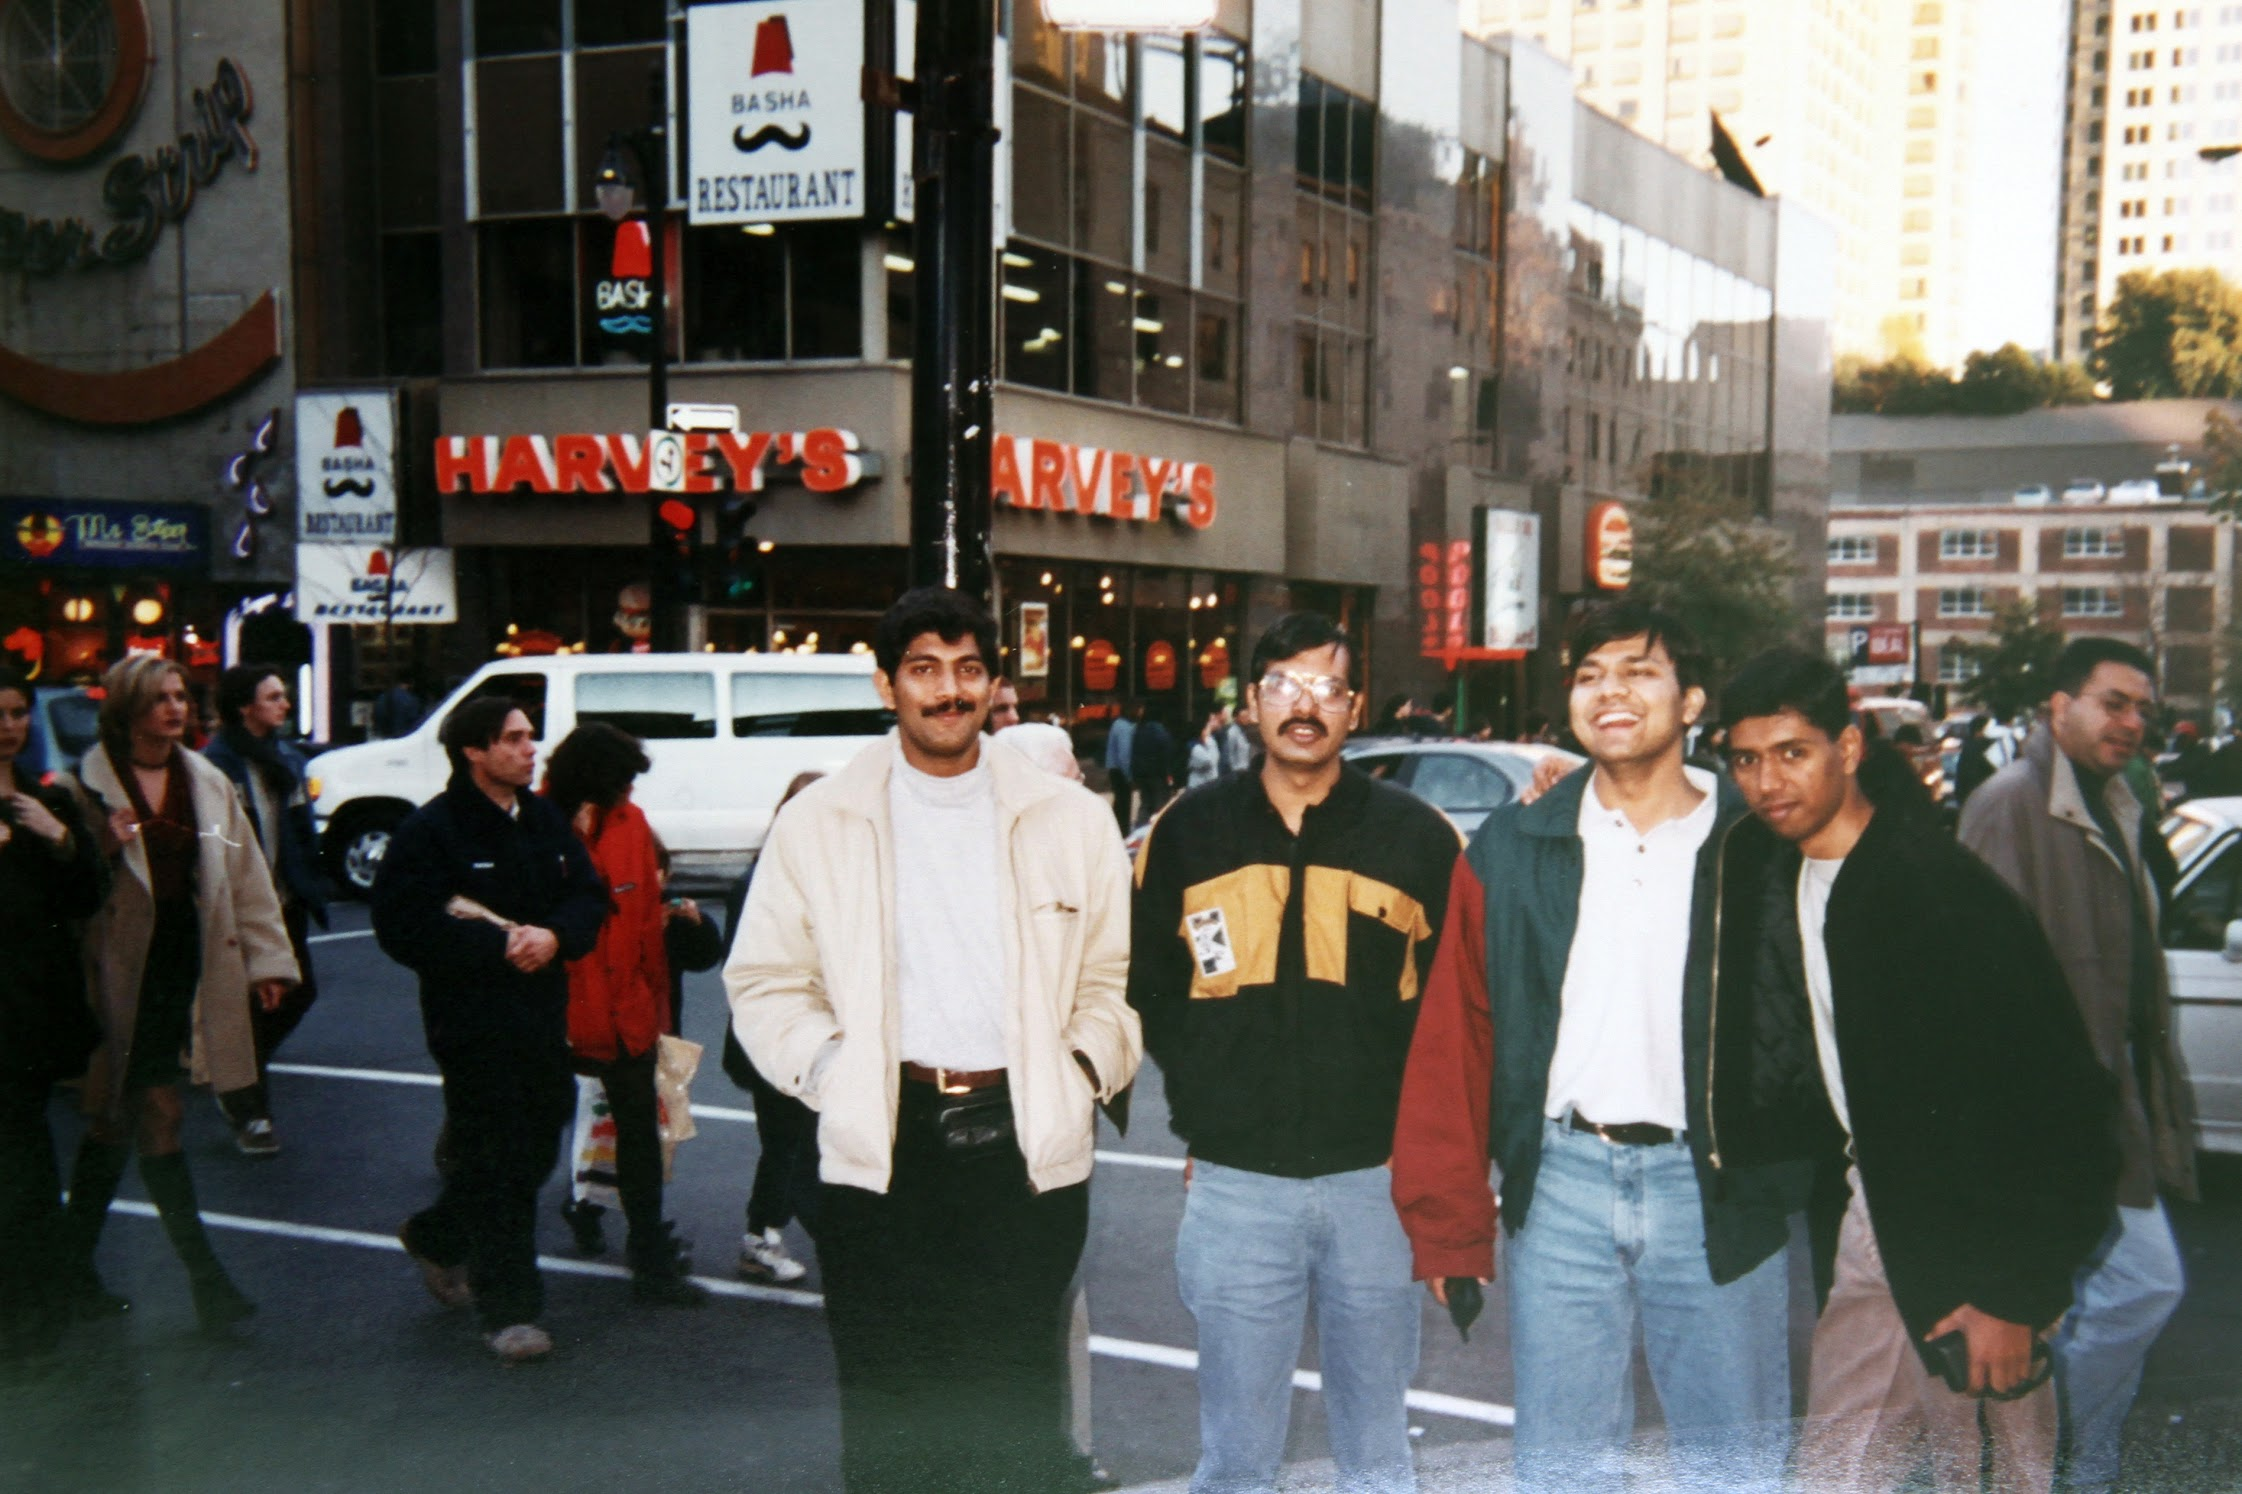

In [8]:
image

In [9]:
text = "A photograph of"
inputs = processor(image, text, return_tensors="pt")

In [10]:
inputs

{'pixel_values': tensor([[[[-1.2229, -1.3105, -1.3251,  ...,  1.8719,  1.8865,  1.8865],
          [-1.2667, -1.3251, -1.3835,  ...,  1.7990,  1.8135,  1.7406],
          [-1.2959, -1.3251, -1.4127,  ...,  1.6530,  1.7260,  1.5800],
          ...,
          [-1.0477, -1.0769, -1.0769,  ..., -0.6682, -0.5368, -0.5660],
          [-1.0623, -1.0769, -1.0769,  ..., -0.8288, -0.6390, -0.5514],
          [-1.0185, -1.0477, -1.0477,  ..., -0.5222, -0.4492, -0.4492]],

         [[-1.3619, -1.3019, -1.2418,  ...,  1.9998,  1.9998,  1.9698],
          [-1.3169, -1.2718, -1.2718,  ...,  1.8798,  1.8948,  1.8047],
          [-1.2869, -1.2418, -1.2869,  ...,  1.7147,  1.7897,  1.6096],
          ...,
          [-0.7466, -0.7316, -0.7316,  ..., -0.4464, -0.2513, -0.1913],
          [-0.7466, -0.7466, -0.7316,  ..., -0.5965, -0.3564, -0.2063],
          [-0.7016, -0.7466, -0.7316,  ..., -0.2363, -0.1313, -0.0862]],

         [[-1.2385, -1.1674, -1.1532,  ...,  2.0037,  1.9895,  1.9610],
          [-1

In [11]:
out = model.generate(**inputs)

In [12]:
out

tensor([[30522,  1037,  9982,  1997,  1037,  2177,  1997,  2111,  3788,  2091,
          1037,  2395,   102]])

In [13]:
print(processor.decode(out[0], skip_special_tokens=True))

a photograph of a group of people walking down a street


<h2>Unconditional Image Captioning</h2>

In [14]:
inputs = processor(image,return_tensors="pt")

In [15]:
out = model.generate(**inputs)

In [16]:
print(processor.decode(out[0], skip_special_tokens=True))

a group of people walking down a street
